# Curso de NLP HuggingFace 🤗
Nesse notebook incluí os resumo dos meus estudos sobre transformers, disponibilizados na plataforma [HuggingFace](https://huggingface.co/learn/nlp-course/chapter1/1).

- Historia e conceitos
- Entendendo arquitetura
- Utilizando transformers
- Ajuste fino
- Disponível em pytorch e tensorflow (opção escolhida)

In [1]:
from IPython.display import Image
from transformers import pipeline

# Pipelines

- Engloba: 
    - Pré-processamento
    - Modelo 
    - Pós-processamento<br>
<br>
- Tipos (LISTA COMPLETA - https://huggingface.co/docs/transformers/main_classes/pipelines)
    - feature-extraction (get the vector representation of a text)
    - fill-mask
    - ner (named entity recognition)
    - question-answering
    - sentiment-analysis
    - summarization
    - text-generation
    - translation
    - zero-shot-classification

In [ ]:
# Classificação
classifier = pipeline('sentiment-analysis')

classifier(texto)

In [ ]:
# Zero-shot
classifier = pipeline('zero-shot-classification')

classifier(
    texto,
    candidate_labels = ['educação', 'politica', 'ciência']
)

In [ ]:
# Geração de texto
generator = pipeline('text-generation')

generator(texto)

In [ ]:
# Geração de texto com modelo adicional
generator = pipeline(
    'text-generation',
    model = 'distilgpt2'    # versão light do gpt2
)

generator(
    max_length = 30,            # Tamanho máximo da sentensa
    num_return_sequences = 2    # Número de sentenças
)

In [ ]:
# Prevendo palavras ausentes
unmasker = pipeline('fill-mask')

unmasker(
    "eu prefiro muito mais <mask> de terror do que ação",
    top_k = 2
)

In [ ]:
# Named entity recognition (NER)
ner = pipeline('ner', grouped_entities = True)

ner('Meu nome é Bruno, eu moro na cidade de Campinas e fui aluno da Unicamp')

In [ ]:
# Respondendo perguntas
question_answerer = pipeline('question_answering')

question_answerer(
    question = 'onde eu moro?',
    context = 'Meu nome é Bruno, eu moro na cidade de Campinas e fui aluno da Unicamp'
)

In [ ]:
# Resumindo
summarizer = pipeline('summarization')

summarizer(
    'textao longo'
)

In [ ]:
# Tradução
translator = pipeline('translation',
                      model = 'modelo_escolhido')

translator('frase na lingua original')

Pesquisar e testar outros tipos e tarefas

# 2. Como funcionam Transformers

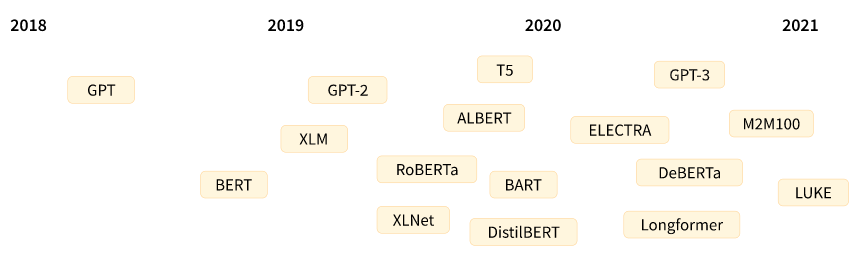

In [7]:
Image(filename = 'data/linha_tempo.png')

Introduzido em 2017, e o objetivo incial era tradução. Podem ser agrupados em 3 tipos:

- GPT-like (auto-regressive Transformer models)
- BERT-like (auto-encoding Transformer models)
- BART/T5-like (sequence-to-sequence Transformer models)

Criados como modelos de linguagem, treinados por quantidades enormes de textos de maneira auto-supervisionada (computar a partir dos input) não necessitando de trabalho humano para classiicação.

Esse tipo de modelo desenvolve um entendimento estatistico da linguagem em que foi treinada, porém não é muit boa para tarefas praticas específicas, por isso é feito processo de transfer learning. Nesse processo o modelo é ajustado de forma supervisionada.

São modelos de grandes dimensões e como estratégia de aprimoramento é necessário aumentar o tamanho do modelo e dos dados em que ele é pré-treinado, o que os torna muito custosos (tempo e computacionalmente).

ML CO2 Impact or Code Carbon which is integrated in 🤗 Transformers

Exemplo de codigo:<br>
from codecarbon import EmissionTracker
<br>
tracker = EmissionTracker()<br>
tracker.start()<br>
GPU intensive code goes here<br>
tracker.stop()<br>

## Transfer learning

Podemos iniciar um modelo do 0, onde disponibilizamos dados para que o modelo, sem conhecimento prévio nos responda algumas questões, porém isso exige um conjunto de dados muito grande e tempo de treinamento.<br>
Assim podemos utilizar modelos ja treinado para fazer ajustes finos utilizando modelos pré-treinados. Para isso vamos executar treinamento adicional com dataset específico para nossa tarefa.<br>
Esse processo exige menos dinheiro, tempo  e dados.

## Arquitetura

- Encoders:
    - Recebe inputs que representam textos (representações numéricas dos textos, ou embedings)
    - Bidirecional
    - Mecanismo de self-attention
    - Úteis para 'adquirir' conhecimento<br>
<br>
- Decoders:
    - Recebe inputs que representam textos (representações numéricas dos textos, ou embedings)
    - Unidirecional
    - Auto-regressivo
    - Mecanismo de masked self-attention
    - Úteis para gerar outputs<br>
<br> 
- Encoder-decoder:
    - Úteis para tarefas generativas que requerem inputs (tradução sumarização)

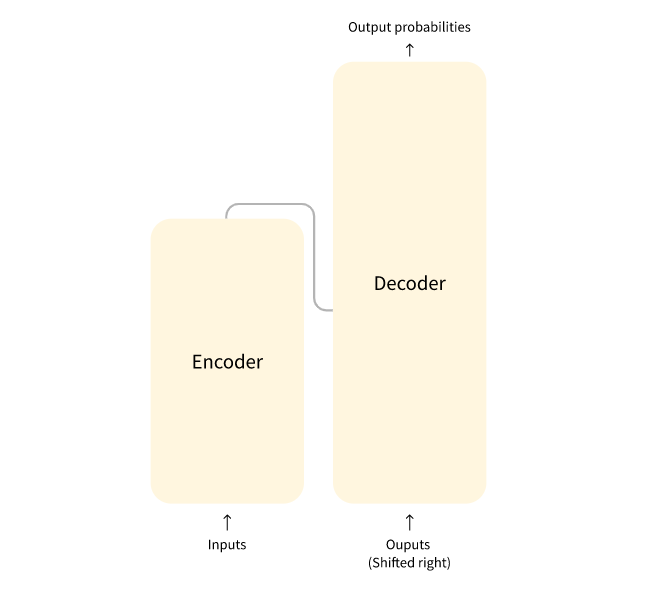

In [8]:
Image(filename = 'data/arquitetura.png')

## Attention Layers

Essa camada da rede basicamente indica quais palavras o modelo deve prestar mais atenção.


# Usando Transformers

## Como funcionam

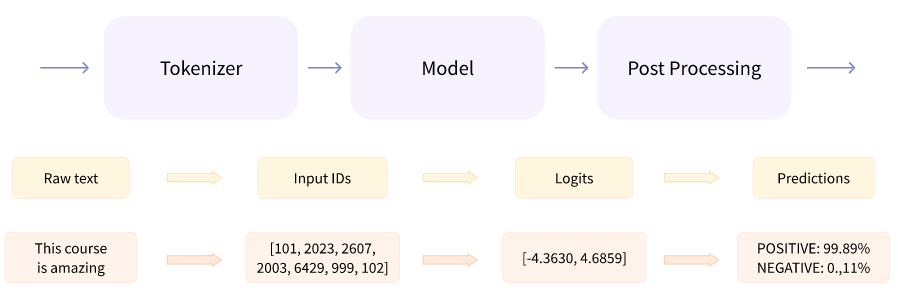

In [9]:
Image(filename = 'data/por_tras_pipelines.png')

## Teste fluxo em um transformer

### Utilizando transformers

In [ ]:
classifier = pipeline('sentiment-analysis', framework = 'tf')

classifier([
    "I really like music",
    "I have a dream to be a musician",
])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

[{'label': 'POSITIVE', 'score': 0.9997808337211609},
 {'label': 'POSITIVE', 'score': 0.9992283582687378}]

### Como funciona

#### Tokenização

Utilizamos autotokenizer para separar elementos do textos em tokens (representações numéricas das palavras) e na sequencia em tensors

In [10]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

d:\ciencia_de_dados\projetos\tera_projeto\venv\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\55199\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
raw_inputs = [
    "I really like music",
    "I have a dream to be a musician",
]
inputs = tokenizer(raw_inputs, padding=True, 
                   truncation=True, return_tensors="tf")
print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[ 101, 1045, 2428, 2066, 2189,  102,    0,    0,    0,    0],
       [ 101, 1045, 2031, 1037, 3959, 2000, 2022, 1037, 5455,  102]])>, 'attention_mask': <tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])>}


#### Dentro do modelo

Para cada input teremos um 'high-dimensional vector' representando a compreensão contextual do input recebido.

In [12]:
from transformers import TFAutoModel

model = TFAutoModel.from_pretrained(checkpoint)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['classifier', 'dropout_19', 'pre_classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


#### High-dimensional vector

O resultado é um vetor de grandes dimensões, geralmente com 3 dimensões:

- Batch size: numero de sequencias processadas (2 no nosso caso)
- Sequence length: o tamanho da representação numerica da sequencia (16 no nosso caso)
- Hidden size: a dimensão do vetor de cada input do modelo

In [13]:
outputs = model(inputs)
print(outputs.last_hidden_state.shape)

(2, 11, 768)


#### Model heads: extraindo sentido dos números

O model heads recebe o 'high-dimensional vector' dos hidden stats como input e os projeta em uma dimensão diferente. Geralmente são compostos de uma ou poucas camadas lineares.

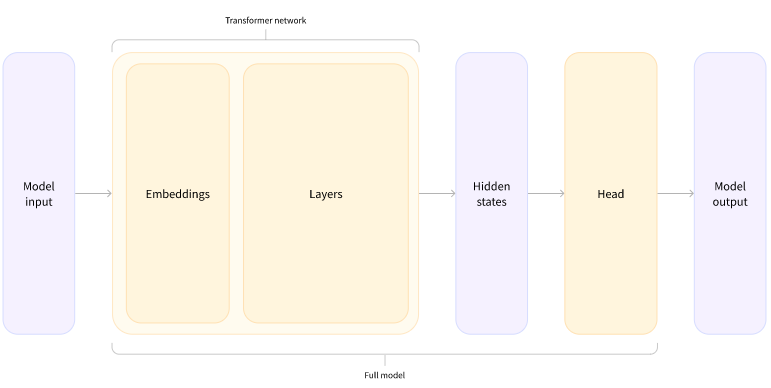

In [31]:
Image(filename = 'data/fluxo_transformer.png')

O modelo é representado pelos embeddings e camadas subsequentes. A cadama de embeddings converte cada ID do input tokenizado em um vetor que representa o token associado. As camadas subsequentes manipulam os vetores usando o mecanismo de 'self-attention' para produzir a representação final das sentenças.

In [14]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_38']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
print(outputs.logits.shape)

(2, 2)


O resultado (acima) é no formato 2 x 2, contendo duas sentenças e duas classificações

#### Pós-processamento

In [16]:
print(outputs.logits)

tf.Tensor(
[[-4.057528  4.368034]
 [-3.284319  3.517034]], shape=(2, 2), dtype=float32)


Nosso modelo previu [-4.057528  4.368034] para a primeira frase e [-3.284319  3.517034] para a segunda. Essas não são probabilidades e sim scores 'crus' e não normalizados (logits). Para serem convertidos para probabilidades precisamos passa-los por uma camada SoftMax

In [19]:
import tensorflow as tf

predictions = tf.math.softmax(outputs.logits, axis=-1)
print(predictions)

tf.Tensor(
[[2.1914410e-04 9.9978083e-01]
 [1.1110335e-03 9.9888903e-01]], shape=(2, 2), dtype=float32)


Agora podemos ver que o modelo previu [0.0002 0.9997] para a primeira frase e [0.0011 0.9988] para a segunda.

Podemos identificar a posição de cada classificação com o atributo 'id2label'. 

In [20]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

Ou seja:
- Primeia sentença: "I really like music" [NEGATIVO: 0.0002, POSITIVO: 0.9997]
- Segunda sentença: "I have a dream to be a musician" [NEGATIVO: 0.0011, POSITIVO: 0.9988]

## Modelos

Aqui iremos entenderemos como criar e usar um modelo.<br>
Podemos usar o 'TFAutoModel' (para instanciar qualquer modelo de maneira rapida e inteligente).

In [ ]:
from transformers import TFAutoModel

bert_model = TFAutoModel('bert-base-cased')
print(type(bert_model))

gpt_model = TFAutoModel('gpt2')
print(type(gpt_model))

bart_model = TFAutoModel('facebook/bart-base')
print(type(bart_model))

 Ou podemos usar a classe de que define a arquitetura do modelo a partir do checkpoint escolhido como 'TFBertModel' e similares.

In [ ]:
from transformers import BertConfig, TFBertModel

# Building the config
config = BertConfig()

# Building the model from the config
model = TFBertModel(config)

A configuração contem todos os atributos do modelo

In [ ]:
print(config)

O modelo é inicializado com parâmetros aleatórios e se usado não terá boa performance. Podemos treina-lo para uma tarefa porém como já vimos ja exitem modelos pré-treinados disponíveis e é importante conseguirmos compartilhar e usar modelos para facilitar essa etapa.<br>
Carregar um modelo pré-treinado é simples:

Se usarmos a classe 'TFAutoModel' e similares iremos criar um código checkpoint-agnóstico, isso quer dizer que se seu código funcionar em um checkpoint ele também deve funcionar nos outros, mesmo se a arquitetura for diferente contanto que seja treinado para a mesma tarefa.

In [ ]:
from transformers import TFBertModel

model = TFBertModel.from_pretrained("bert-base-cased")

Nesse caso acima não utilziamos o 'BertConfig', ao invés disso nós carregamos o modelo pré-treinado via identificador 'bert-base-cased'.<br>
Esse modelo está agora inicializado com todos os 'pesos' do checkpoint e pode ser usado para inferência das tarefas para qual foi treinado e também pode ser ajustado para novas tarefas. Fazendo esse processo podemos alcançar bons resultados rapidamente.

### Salvando modelo

In [ ]:
model.save_pretrained("directory_on_my_computer")

Com o método acima são salvos 2 arquivos em disco

In [ ]:
ls directory_on_my_computer

config.json tf_model.h5

O se olharmos o arquivo 'config.json' veremos todos os atributos necessários para construir a arquitetura do modelo e outros metadados.<br>
O arquivo 'tf_model.h5' contém todos os 'pesos' do modelo

## Tokenizers

Propósito principal é converter texto em dados que podem ser processados pelo modelo.<br>
Porém podemos fazer separação dos componentes do texto de maneira diferente:
- Baseado em palavras: limitação de tamanho (modelos grandes) palavras similares podem ser entendidas pelos modelos de maneira muito diferentes
- Baseado em caracter: tamanho reduzido (caracteres possíveis na lingua). Carrega menos significado em relação ao metodo anterior e tokens podem ter grandes dimensões
- Baseado em subword (subpalavras): palavras frequentes não são divididas em menores e palavras raras são divididas em subpalavras significativas

A meioria dos modelos que atingem estado da arte em inglês atualmente usam algum tipo de tokenização  baseado em subword

### Carregando e salvando

### Classe específica

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

### Usando AutoTokenizer

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
tokenizer("Using a Transformer network is simple")

### Salvando modelo

In [ ]:
tokenizer.save_pretrained("directory_on_my_computer")

### Pipeline

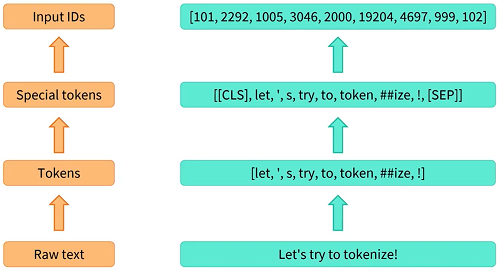

In [4]:
Image(filename = 'data/tokenizacao.png')

#### Tokenização

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

Output deve ser esse:

In [ ]:
['Using', 'a', 'transform', '##er', 'network', 'is', 'simple']

#### Transformando tokens em IDs

In [ ]:
inputs_ids = tokenizer.convert_tokens_to_ids(tokens)

print(inputs_ids)

Nessa etapa também são adicionados tokens especiais, esperados pelo modelo (101 no inicio da sequencia  e 102 no final)

In [ ]:
final_inputs = tokenizer.prepare_for_model(inputs_ids)
print(final_inputs['inputs_ids'])

# tentar
print(final_inputs)

Os output resultantes, convertidos em tensores apropriados para o framework usado, podem ser usados como input para o modelo.

#### Decoding

In [ ]:
decoded_string = tokenizer.decode(inputs_ids)
print(decoded_string)

In [ ]:
print(tokenizer.decode(tokens['input_ids']))

## Multiplas entradas

Se duas entredas tiverem tamanhos diferentes iremos encontrar erros, pois só são admitidos tensores de tamanhos iguais.<br>
Para resolver esse problema é utilizado 'padding', preenchimento da sequencia menor por 0 (nesse caso) para que a sequencia menor tenha o mesmo tamanho da sequencia final.<br>

Exemplo de sequencia convertida em tokens:
- 1 = [234, 566, 6758, 874, 74747, 875, 665, 1001, 2004, 3546] (10 itens)
- 2 = [456, 876, 935, 809, 987] (5 itens)

Após 'padding':
- 1 = [234, 566, 6758, 874, 74747, 875, 665, 1001, 2004, 3546] (10 itens)
- 2 = [456, 876, 935, 809, 987, 0, 0, 0, 0, 0] (10 itens)

Tendo listas de mesmo tamanho agora precisamos indicar para as camadas de atenção quais termos devem ser ignorados(os 0 adicionados anteriormente) aplicando uma mascara de atenção (attention_mask)  



## Juntando tudo

Nos passos anteriores fizemos todas as etapas manualmente, porém a API Transformers já faz isso para nós com uma função de alto nível.<br>

Quando instanciamos o tokenizer direto  na sentença, voce recebe de volta inputs para serem colocados no modelo

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

A variável 'model_inputs' contém tudo que é necessário para o modelo operar bem. Para 'DistilBERT', estão incluidos o ID do input e as attention mask. Esse método pode tokenizar uma ou mais sentenças

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)

# OU

sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequence)

Usa o 'padding' de acordo com vários objetivos

In [ ]:
model_inputs = tokenizer(
    sequences, 
    padding="longest"                     # padding com a maior sentença 
    # padding="max_length"                # padding com a tamanho maximo do modelo
    # padding="max_length", max_length=8  # padding com tamanho especifico   
)

Truncando sequencias é necessário para o modelo receber o formato padrão, ou seja sentenças de tamanhos iguais.

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Truncagem de sequencias maiores que o tamanho maximo do modelo
# (512 para BERT ou DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Truncagem de sequencias que são maiores do que o tamanho maximo estipulado
model_inputs = tokenizer(sequences, max_length=8, 
                         truncation=True)

O tokenizador pode lidar com varios frameworks, que podem ser indicados para o modelo diretamente.

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Retorna PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, 
                         return_tensors="pt")

# Retorna TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, 
                         return_tensors="tf")

# Retorna NumPy arrays
model_inputs = tokenizer(sequences, padding=True, 
                         return_tensors="np")

Ao verificarmos os IDs dos inputs vemos um resultados um pouco diferente do que vimos antes, isso é devido adição de tokens especiais indicando o início ([CLS]) e o final ([SEP]). Esse comportamento pode mudar de modelo para modelo

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

In [ ]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

### O produto final

Nessas poucas linhas de códigos estão agrupados todos os passos anteriores

In [ ]:
import tensorflow as tf
from transformers import (
    AutoTokenizer, TFAutoModelForSequenceClassification
)

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, 
                   truncation=True, return_tensors="tf")
output = model(**tokens)

# Ajuste fino de modelo pré-treinado

## Processando dados

Treinamento de classificador

In [ ]:
import tensorflow as tf
import numpy as np
from transformers import (
    AutoTokenizer, TFAutoModelForSequenceClassification
)

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = dict(tokenizer(sequences, padding=True, 
                       truncation=True, return_tensors="tf"))

# This is new
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor([1, 1])
model.train_on_batch(batch, labels)

Porém somente 2 sentenças não são suficientes para treinamento.<br>

### Carregando modelo do HUB

Usaremos como exemplo o dataset MRPC (Microsoft Research Paraphrase Corpus) que consiste em 5.801 pares de sentenças classificadas como parafrase ou não (frases com o mesmo sentido).
Esse dataset é um dos muitos que compõem o GLUE benchmark, (academico usado para mensurar a performance de modelos de ML com diferentes tarefas de classificação)

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

Recebemos um objeto DatasetDict contendo conjunto de treino, validação e teste, cada um contendo as colunas 'sentence1', 'sentence2', 'label', e 'idx' e uma variedade de numeros de linhas que são os elementos em cada conjunto (3,668 pares de sentenças no treino, 408 na validação e 1,725 no teste)

Podemos acessar cada par de sentenças no dataset usando index, como em um dicionário

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

Nesse caso os rótulos ja são 'int' então não precisamos pré-processar. Para sabermos mais sobre as características do dataset podemos usar o atributo features

In [ ]:
raw_train_dataset.features

### Pré-processando um dataset

Utilizando 'tokenizer' para converter texto em números para o modelo conseguir processar os dados. Podemos alimentar o 'tokenizer' com uma sentença ou uma lista de sentenças

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

Podemos também passar somente um par de frases para sabermos se são equivalentes ou não. Precisamos passar as duas sequencias como um par e aplicar o pré-processamento necessário

In [ ]:
inputs = tokenizer("This is the first sentence.", 
                   "This is the second one.")
inputs

Nesse caso temos input_ids (discutido anteriormente), attention_mask (discutido anteriormente) e token_type_ids (nos diz qual é a primeira e qual é a segunda frase)

Podemos converter os inputs_ids para palavras novamente usando

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

O modelo espera que os inputs tenha o formato [CLS] frase1 [SEP] (ids 0) frase2 [SEP] (ids 1) quando temos 2 frases. Se alinharmos isso com o token_type_ids vemos que temos o tamanho correto das frases.<br>
Importante lembrar que nem todos os checkpoint usam esse mesmo padrão, então para não ocorrerem erros é importante usar o mesmo checkpoint 

O processo com as duas sentenças aplicado a todo o dataset seria da seguinte forma

In [ ]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

Esse método tema  desvantagem de retornar um dicionário e só irá funcionar se tiver espaço duficiente na memória RAM para armazenar o dataset inteiro durante a tokenização (os datasets da biblioteca 🤗 são arquivos Apache Arrow armazenados em disco).<br>
Para manter os dados como dataset usamos 'Dataset.map()', o que permite flexibilidade extra se precisarmos fazer mais pré-rocessamento além da tokenização. O método 'map()' funciona aplicando a função em cada elemento do dataset.

In [ ]:
# Definindo a função
def tokenizacao(exemplo):
    return tokenizer(exemplo['sentence1'], exemplo['sentence2'], 
                     truncation = True)

Essa função recebe um dicionário  e retorna  um novo dicionário com input_ids, attention_mask, e token_type_ids. Isso funciona também se tivermos várias amostras (cada chave com uma lista de sentenças) já que o tokenizer funciona com lista de pares de sentenças. Isso permite utilizarmos a opção 'batch = True' quando usamos 'map()', o que acelera o processo de tokenização.<br>
Ainda não utilizamos o 'padding' pois fazer pelo tamanho máximo não é eficiente, sendo melhor faze-lo quando estivermos construindo os batches, pois usaremos o tamanho máximo de cada batch, podendo economizar muito tempo e poder de processamento.<br>
Usamos a função de tokenização, batch e map() da seguinte forma: 

In [ ]:
tokenized_datasets = raw_datasets.map(tokenizacao, batched=True)
tokenized_datasets

A biblioteca 🤗 Datasets aplica esse procedimento é adicionando novos campos ao dataset (um para cada chave no dicionário gerado pela função de pré-procesamento).<br>
Também podemos usar multiprocessing usando a função com 'map()' adicionando argumento num_proc.<br>
Nossa função tokenizacao retorna um dicionario com 'input_ids', 'attention_mask', e 'token_type_ids', campos adicionado a todas as divisões do nosso dataset (treino, validação e teste). Podemos também mudar campos existentes.

### Padding dinamico

A função responsável por agrupar amostras dentro de um batch é chamada de 'collate'. Por padrão ela vai somente converter sua amostra em tensores e concatenar elas (recursivamente se seus elementos são listas, tuplas ou dicionários).<br>
Com 🤗 Transformers nós temos 'DataCollatorWithPadding'.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        return_tensors="tf")

Vamos testar esse novo brinquedo selecionando algumas amostras do nosso conjunto que queremos colocar em um batch. Removemos as colunas 'idx', 'sentence1' e 'sentence2' (não serão necessárias e contém strings, que não são possíveis criar tensores), e vamos verificar o tamanho de cada entrada no batch

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() 
           if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

Os tamanhos variam. Com 'padding' dinamico todas as entradas ficarã com tamanho de 67, que é o tamanho maximo dentro do batch. Sem essa técnica todas as entradas ficariam com o tamanho da maior entrada no dataset ou do tamanho maximo que o modelo suporta.<br>

In [ ]:
# Checando o resultado
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

Agora que temos o dataset e o collator precisamos coloca-los juntos, e podemos carregar os batches manualmente mas é muito trabalhoso e com baixa performance.<br>
Para isso temos o 'to_tf_dataset()', que irá embrulhar um 'tf.data.Dataset' em volta do seu dataset, com uma função collation opcional. 'tf.data.Dataset' é um formato nativo do TensorFlow que o Keras pode usar para 'model.fit()', então esse método converte imediatamente um '🤗 Dataset' para o formato que está pronto para treino

In [ ]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

## Ajuste fino do modelo com Keras

Para melhor rodar os códigos é sugerido usar GPUs ou TPUs no colab.

In [ ]:
# Revendo passos anteriores
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], 
                     truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, 
                                      batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        return_tensors="tf")

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

### Treinando

Modelos do tensorflow importados da biblioteca 🤗 Transformers já são modelos Keras.  

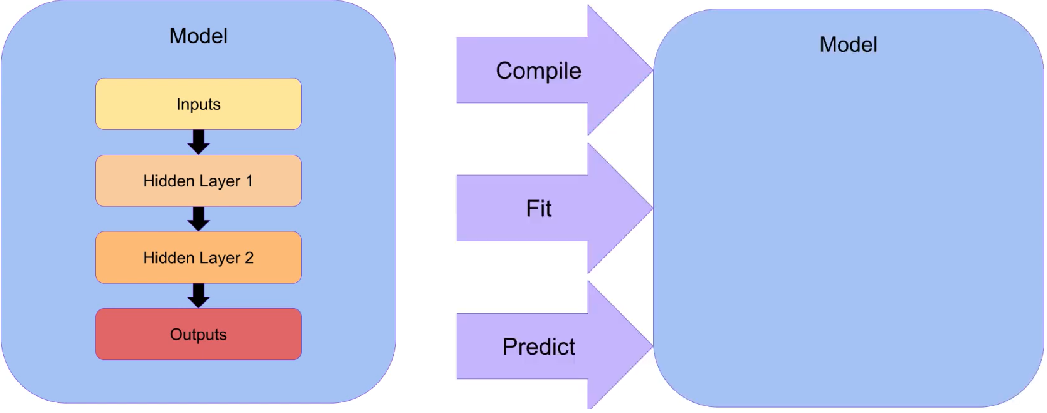

In [4]:
Image(filename = 'data/objeto_modelo_keras.png')

Acima representado um objeto "modelo" do Keras. Pode ser construido "a mão" do nada porém podemos carregar os modelos pré carregados com 'pesos' e outras características o que faciliata o processo.
Com a API toda a complexidade de uma rede neural se torna manuseavel. Todos os modelos tem o mesmo funcionamento da API

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

loss = SparseCategoricalCrossentropy(from_logits=True)

model.compile(
    optimizer="adam",
    loss=loss,
    metrics=["accuracy"],
)

Função 'loss' pode ser chamada com string mas pode gerar erros

In [ ]:
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
)

Para fazer os ajustes finos no modelo com nossos dados temos que 'compile()' nosso modelo e então passar nossos dados no método 'fit()' e isso inciará o processo de ajuste, que deve levar alguns minutos em uma GPU reportando a perda do treinamento com o processo desenrolando, assim como a perda da validação ao final de cada epoca.

## Aprimorando a performance do treino

Com esse modelo ja teremos resultados relevantes, porém veremos que a perda diminui devagar ou esporadicamente, e a primeira causa disso pode ser a taxa de aprendizado. Por padrão a taxa do modelo é muito alta 1e-3 (ou 10 elevado a -3, ou 0.001). Por experiencia dos experts sabe-se que modelos como transformers se beneficiam de uma taxa de aprendizado mais baixa. Vamos diminuir para 5e-5 (ou 0.00005), uma taxa 20 vezes mais baixa, que seria um bom parametro inicial.<br>
<br>
Também podemos utilizar outro recurso que é reduzir a taxa de aprendizado de com o passar do tempo. No Keras o melhor jeito de aplicarmos esse conceito é com 'learning rate scheduler'. Uma boa maneira para isso é utilizar 'PolynomialDecay()' que apesar do nome com os parametros padrão é somente um decaimento linear ao longo do treinamento. Para executa-lo corretamente precisamos dizer qual a duração do treinamento, que sera estipulado como 'num_train_steps' abaixo:

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

batch_size = 8
num_epochs = 3
# Numero de training steps é numero total de amostras no dataset dividido pelo tamanho do batch então multiplicado pelo numero de epocas. 
# Note que 'tf_train_dataset' é um batched tf.data.Dataset, não um dataset original HuggingFace, então len() já é num_samples // batch_size.
num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, 
    decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

Agora temos um otimizador e podemos treinar com ele. Vamos recarregar o modelo para resetar as mudanças dos 'pesos' com o treinamento que fizemos agora a pouco, então podemos compilar o novo otimizador

In [ ]:
import tensorflow as tf

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

E utilizamos 'fit()' novamente

In [ ]:
model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=3)

Para conseguirmos retornar as saídas do modelo treinado, computar algumas métricas ou utilizar em produção podemos usar o método 'predict()', que irá nos retornar 'logits', um para cada classe.

In [ ]:
preds = model.predict(tf_validation_dataset)["logits"]

Podemos converte-los nas classes preditas do nosso modelo utilziando 'argmax' para achar o 'logit' mais alto, que corresponde a classe mais provável.

In [ ]:
class_preds = np.argmax(preds, axis=1)
print(preds.shape, class_preds.shape)

Vamos utilizar algumas métricas com 'preds'. Iremos carregar metricas associadas com o dataset em questão, utilizando a função 'evaluate.load()'. O objeto retornado tem tem um método 'compute()' para calculo de métricas.

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, 
               references=raw_datasets["validation"]["label"])

### Opção disponibilizada no vídeo (alternativa - entender)

Isso carrega e utiliza as métricas do 'GLUE'

In [ ]:
preds = model.predict(tokenized_datasets['validation'])['logits']
probabilities = tf.nn.softmax(preds)
class_preds = np.argmax(probabilities, axis=1)

In [ ]:
from datasets import load_metric

metric = load_metric("glue", "mrpc")
metric.compute(predictions = class_preds, 
               references = validation_labels)

Metricas nativas do Keras

In [ ]:
model.compile(loss = loss, opt = opt, metrics = ['accuracy'])

## Treino completo (com PyTorch)

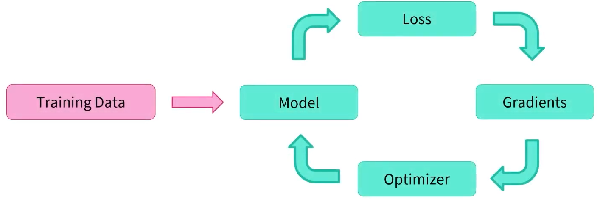

In [3]:
# Exemplo de training loop
Image(filename = 'data/esquema_trainingloop.png')

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], 
                     truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
# tokenized_datasets = tokenized_datasets.remove_columns(['sentence1', 'sentence2', 'idx'])     # Adições presentes no vídeo
# tokenized_datasets = tokenized_datasets.rename_columns('label', 'labels')                     # Aparecem na próxima etapa
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Preparação para treino

Precisamos definir alguns objetos como 'dataloaders' (para iterar nos batches), mas antes precisamos um pouco de pré-processamento nos nossos 'tokenized_datasets' que o 'Trainer' fez por nós automaticamente.<br>

Precisamos, então:
- Remover colunas que não serão usadas no modelo
- Renomear colunas
- Estipular formato (PyTorch tensor ao invés de listas)

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["sentence1", "sentence2", "idx"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets["train"].column_names

Agora podemos definir nossos 'dataloaders'

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, 
    batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=8, 
    collate_fn=data_collator
)

Podemos checar se não há erros no processo, inspecionando um batch

In [ ]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

Após o préprocessamento podemos focar no modelo

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Para nos certificarmos que ocorrerá de forma adequada passamos um batch para o modelo

In [ ]:
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)

Todos os modelos 🤗 Transformers retornam a perda quando os rótulos são dados, e também temos os logits.<br>

Precisamos também de um otimizador e de uma cronograma de taxa de aprendizado. Como estamos simulando o que o Trainer fez usaremos os mesmos parametros.

O otimizador utilizado pelo Trainer é o 'AdamW' (similar ao Adam, porém com uma alteração na regularização do decaimento)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

Para definir adequadamente precisamos saber a quantidade de 'training steps', que é o número de épocas que queremos executar multiplicado pelo pelo número de 'training batches' (que é o tamanho do nosso 'training dataloader').

In [ ]:
from transformers import get_scheduler

num_epochs = 3                                              # Número padrão do Trainer
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

### Training Loop

Caso esteja disponível podemos optar por usar uma GPU (ou o processo demorará um tempo considerável). Para isso definimos um 'device' no qual colocaremos nosso modelo e 'batches'

In [ ]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

Podemos treinar agora. Adicionamos uma barra de progresso para acompanhar  o andamento

In [ ]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

Precisamos também adicionar um loop para avaliar como o modelo está se saindo

### Evaluation Loop

Usaremos novamente uma métrica disponibilizada pela biblioteca 🤗 Evaluate. Já vimos o método 'metric.compute()', mas as métricas podem acumular os batches de acordo com o progresso do loop de previsão com o método 'add_batch()'. Quando acumularmos todos os batches temos o resultado final com 'metric.compute()'

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

### Otimizando o training loop com Accelerate

O training loop anterior funciona bem em uma CPU/GPU, mas usando a biblioteca 🤗 Accelerate com alguns ajustes poddemos disponibillizar um treinamento distribuido  em multiplas CPUs/GPUs. Começando da criação de dataloaders de treino e validação nosso loop seria assim

In [ ]:
from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = AdamW(model.parameters(), lr=3e-5)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

E podemos adicionar mudanças assim

In [ ]:
+ from accelerate import Accelerator
  from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

+ accelerator = Accelerator()

  model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
  optimizer = AdamW(model.parameters(), lr=3e-5)

- device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
- model.to(device)

+ train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(
+     train_dataloader, eval_dataloader, model, optimizer
+ )

  num_epochs = 3
  num_training_steps = num_epochs * len(train_dataloader)
  lr_scheduler = get_scheduler(
      "linear",
      optimizer=optimizer,
      num_warmup_steps=0,
      num_training_steps=num_training_steps
  )

  progress_bar = tqdm(range(num_training_steps))

  model.train()
  for epoch in range(num_epochs):
      for batch in train_dataloader:
-         batch = {k: v.to(device) for k, v in batch.items()}
          outputs = model(**batch)
          loss = outputs.loss
-         loss.backward()
+         accelerator.backward(loss)

          optimizer.step()
          lr_scheduler.step()
          optimizer.zero_grad()
          progress_bar.update(1)

Importamos na primeira linha e na segunda instanciamos o objeto Accelerator, que irá observar o ambiente e incializar o setup de distribuição necessária, e o 🤗 Accelerate cuida da escolha do 'device', então podemos tirar essa linha.<br>

O trabalho pesado é feito na linha em que mandamos os dataloaders, o modelo, e o otimizador para o 'accelerator.prepare()', isso encapsulará esses objetos no container apropriado para que o treinamento distribuido funcione adequadamente. Devemos também remover as linhas que coloca o batch no device e trocar 'loss.backward()' por 'accelerator.backward(loss)'.

Loop completo com 🤗 Accelerate

In [ ]:
from accelerate import Accelerator
from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

accelerator = Accelerator()

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = AdamW(model.parameters(), lr=3e-5)

train_dl, eval_dl, model, optimizer = accelerator.prepare(
    train_dataloader, eval_dataloader, model, optimizer
)

num_epochs = 3
num_training_steps = num_epochs * len(train_dl)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dl:
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

Colocando isso em um script train.py possibilitará que seja rodado em qualquer setup distribuido. Para isso rode o comando:

In [ ]:

accelerate config

Você tera que responder algumas perguntas e colocar as respostas em um arquivo de configuração usando o comando abaixo, que iniciara o treinamento distribuido.



In [ ]:
accelerate launch train.py

Se quiser testar em um notebook (por exemplo, testar com TPUs no Colab), copie e cole o código em uma função training_function() e rode uma ultima célula com:

In [ ]:
from accelerate import notebook_launcher

notebook_launcher(training_function)